In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
df1 = pd.read_csv("data_csv.csv")

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8242 entries, 0 to 8241
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AccountPk         8242 non-null   int64  
 1   TotalBalance      8242 non-null   float64
 2   Expenses          8242 non-null   float64
 3   EmploymentBasis   7773 non-null   object 
 4   IncomeBand        8011 non-null   object 
 5   State             8231 non-null   object 
 6   FGF Score         8242 non-null   int64  
 7   Age               8242 non-null   int64  
 8   Age Group         8242 non-null   object 
 9   Resilience_Score  8242 non-null   float64
 10  Segment           8242 non-null   object 
 11  Clustering        8242 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 772.8+ KB


In [7]:
cor = df1.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm').set_precision(2)

,AccountPk,TotalBalance,Expenses,FGF Score,Age,Resilience_Score
AccountPk,1.00,-0.02,0.04,-0.02,0.05,-0.03
TotalBalance,-0.02,1.00,0.16,0.16,0.05,0.90
Expenses,0.04,0.16,1.00,0.17,0.19,-0.11
FGF Score,-0.02,0.16,0.17,1.00,0.36,0.10
Age,0.05,0.05,0.19,0.36,1.00,-0.01
Resilience_Score,-0.03,0.90,-0.11,0.10,-0.01,1.00


In [8]:
# Separate the dependent variable and independent variables
y = df1['Resilience_Score']
X = df1[['TotalBalance', 'Expenses', 'FGF Score','Age']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

In [9]:
# Fit the multiple regression model
model = sm.OLS(y, X).fit()

In [10]:
# Print the statistical summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Resilience_Score   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 1.354e+04
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:22:57   Log-Likelihood:                -4546.7
No. Observations:                8242   AIC:                             9103.
Df Residuals:                    8237   BIC:                             9138.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7870      0.034     22.902   

In [11]:
df1.dropna(how='all', axis=1, inplace=True)
df1.drop (columns = "EmploymentBasis",axis=1,inplace=True)
df1.drop (columns = "IncomeBand",axis=1,inplace=True)
df1.drop (columns = "State",axis=1,inplace=True)
df1.drop (columns = "Age Group",axis=1,inplace=True)
df1.drop (columns = "Segment",axis=1,inplace=True)
df1.drop (columns = "Clustering",axis=1,inplace=True)
df1.drop (columns = "AccountPk",axis=1,inplace=True)
df1.drop (columns = "FGF Score",axis=1,inplace=True)
display(df1)

,TotalBalance,Expenses,Age,Resilience_Score
0,132.40,469.6900,26,0.281888
1,673.26,1164.3157,56,0.578245
2,179.55,919.8907,28,0.195186
3,718.51,490.0000,39,1.466347
4,3.39,555.0000,45,0.006108
...,...,...,...,...
8237,15.53,1402.4292,48,0.011074
8238,49.87,850.0315,44,0.058668
8239,130.03,862.0461,43,0.150839
8240,87.60,867.1007,25,0.101026


In [12]:
#zscore for TB
df1['zscoreTB'] = (df1.TotalBalance - df1.TotalBalance.mean())/df1.TotalBalance.std()
df1.head(5)

,TotalBalance,Expenses,Age,Resilience_Score,zscoreTB
0,132.40,469.6900,26,0.281888,-0.612880
1,673.26,1164.3157,56,0.578245,-0.096153
2,179.55,919.8907,28,0.195186,-0.567834
3,718.51,490.0000,39,1.466347,-0.052922
4,3.39,555.0000,45,0.006108,-0.736133


In [13]:
#zscore for Exp
df1['zscoreExp'] = (df1.Expenses - df1.Expenses.mean())/df1.Expenses.std()
df1.head(5)

,TotalBalance,Expenses,Age,Resilience_Score,zscoreTB,zscoreExp
0,132.40,469.6900,26,0.281888,-0.612880,-1.349399
1,673.26,1164.3157,56,0.578245,-0.096153,0.380393
2,179.55,919.8907,28,0.195186,-0.567834,-0.228287
3,718.51,490.0000,39,1.466347,-0.052922,-1.298822
4,3.39,555.0000,45,0.006108,-0.736133,-1.136956


In [14]:
#zscore outlier detection and removal
df_no_outliers = df1[(df1.zscoreTB>-3) & (df1.zscoreTB<3)]
df_no_outliers = df1[(df1.zscoreExp>-3) & (df1.zscoreExp<3)]
df_no_outliers.head()

,TotalBalance,Expenses,Age,Resilience_Score,zscoreTB,zscoreExp
0,132.40,469.6900,26,0.281888,-0.612880,-1.349399
1,673.26,1164.3157,56,0.578245,-0.096153,0.380393
2,179.55,919.8907,28,0.195186,-0.567834,-0.228287
3,718.51,490.0000,39,1.466347,-0.052922,-1.298822
4,3.39,555.0000,45,0.006108,-0.736133,-1.136956


In [15]:
#normalising the data of X
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_no_outliers)

norm_df = pd.DataFrame(normalized_data, columns = df_no_outliers.columns)

print('norm data with MinMaxScaler')
print(norm_df)

norm data with MinMaxScaler
      TotalBalance  Expenses       Age  Resilience_Score  zscoreTB  zscoreExp
0         0.022185  0.038415  0.135593          0.022515  0.022185   0.038415
1         0.112823  0.421435  0.644068          0.046187  0.112823   0.421435
2         0.030086  0.286658  0.169492          0.015590  0.030086   0.286658
3         0.120407  0.049614  0.355932          0.117125  0.120407   0.049614
4         0.000565  0.085456  0.457627          0.000487  0.000565   0.085456
...            ...       ...       ...               ...       ...        ...
8149      0.002599  0.552732  0.508475          0.000884  0.002599   0.552732
8150      0.008354  0.248137  0.440678          0.004685  0.008354   0.248137
8151      0.021787  0.254762  0.423729          0.012047  0.021787   0.254762
8152      0.014677  0.257550  0.118644          0.008069  0.014677   0.257550
8153      0.138430  0.228937  0.084746          0.080938  0.138430   0.228937

[8154 rows x 6 columns]


In [16]:
# Separate the dependent variable and independent variables
y2 = norm_df['Resilience_Score']
X2 = norm_df[['TotalBalance', 'Expenses','Age']]

print(y2.shape)  # shape of the dependent variable
print(X2.shape)

# Add a constant term to the independent variables
X2 = sm.add_constant(X2)

(8154,)
(8154, 3)


In [17]:
# Fit the multiple regression model
model1 = sm.OLS(y2, X2).fit()

In [18]:
# Print the statistical summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:       Resilience_Score   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 1.881e+04
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:22:59   Log-Likelihood:                 16264.
No. Observations:                8154   AIC:                        -3.252e+04
Df Residuals:                    8150   BIC:                        -3.249e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0386      0.001     43.502   

In [19]:
#X contains tb, expenses and age and y contains resilience score
X = df_no_outliers.iloc[:,:3] # 1t for rows and second for columns
y = df_no_outliers['Resilience_Score']
X

,TotalBalance,Expenses,Age
0,132.40,469.6900,26
1,673.26,1164.3157,56
2,179.55,919.8907,28
3,718.51,490.0000,39
4,3.39,555.0000,45
...,...,...,...
8237,15.53,1402.4292,48
8238,49.87,850.0315,44
8239,130.03,862.0461,43
8240,87.60,867.1007,25


In [20]:
#split the dataset into train and test with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train

,TotalBalance,Expenses,Age
295,132.75,649.9346,25
6027,3101.03,1009.8780,45
3822,373.32,950.2500,34
3810,156.36,1489.5003,23
6778,86.70,831.4592,61
...,...,...,...
5282,238.00,1007.9715,40
5448,228.53,542.1161,63
862,904.78,998.7723,41
7687,85.88,595.2884,31


In [22]:
X_train.shape, X_test.shape

((6523, 3), (1631, 3))

In [23]:
y_train.shape, y_test.shape

((6523,), (1631,))

In [24]:
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

LinearRegression()

In [25]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  0.795360340118781
Coefficients:


[('TotalBalance', 0.0010463995512215584),
 ('Expenses', -0.0007691079141473509),
 ('Age', -0.000379798973888944)]

In [26]:
#Prediction of test set
y_pred_mlr= mlr.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.6085677  0.99660209 0.46472812 ... 1.09139267 3.19539446 0.25410478]


In [27]:
#table showing the actual value and the predicted value from the model 
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
4383,0.561339,0.608568
1205,1.174391,0.996602
7204,0.538883,0.464728
1769,0.019046,0.063497
929,4.510041,3.984079


In [28]:
#model evaluation which looks into the regression statistics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 87.38
Mean Absolute Error: 0.23240352490928387
Mean Square Error: 0.15957769623877158
Root Mean Square Error: 0.3994717715168014


In [29]:
#evaluate the model and check the accuracy 
Accuracy = r2_score(y_test,y_pred_mlr)*100
print("Accuracy of the model is %.2f" %Accuracy)

Accuracy of the model is 88.02


Text(0, 0.5, 'Predicted')

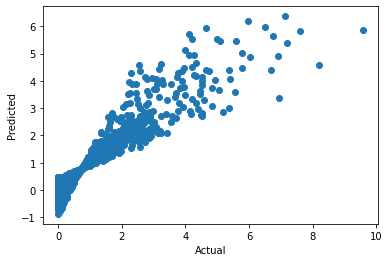

In [30]:
#plot the results
plt.scatter(y_test,y_pred_mlr)
plt.xlabel('Actual')
plt.ylabel('Predicted')


Text(0, 0.5, 'Predicted')

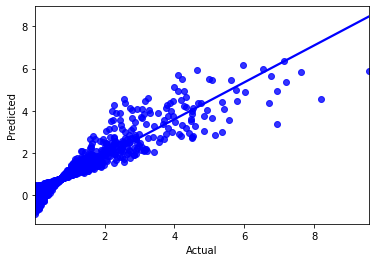

In [31]:
#reg plot for the model 
sns.regplot(x=y_test, y=y_pred_mlr,ci=None,color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [32]:
#difference between the predicted values and actual values
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_mlr,'Difference':y_test - y_pred_mlr})
pred_df

,Actual Value,Predicted Value,Difference
4383,0.561339,0.608568,-0.047228
1205,1.174391,0.996602,0.177789
7204,0.538883,0.464728,0.074155
1769,0.019046,0.063497,-0.044451
929,4.510041,3.984079,0.525962
...,...,...,...
5101,0.164732,0.443343,-0.278611
7026,0.403881,0.372979,0.030903
7568,1.201180,1.091393,0.109787
5113,2.271275,3.195394,-0.924119
